In [1]:
import numpy as np
import pandas as pd

In [2]:
# Попробуем визуализировать некоторые метрики и провести с помощью визуализации некоторый анализ,
# а также ответим на некоторые вопросы по данным
data = pd.read_csv('sessions.csv')

In [3]:
data.head()

,date,session_id,user_id,duration,value,has_purchase
0,2022-07-01,785266,109298,1680,137,0
1,2022-07-01,785333,119496,713,77,0
2,2022-07-01,785490,123265,1266,88,0
3,2022-07-01,785585,132511,844,14,0
4,2022-07-01,785635,132728,1534,231,0


In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.head()

,date,session_id,user_id,duration,value,has_purchase
0,2022-07-01,785266,109298,1680,137,0
1,2022-07-01,785333,119496,713,77,0
2,2022-07-01,785490,123265,1266,88,0
3,2022-07-01,785585,132511,844,14,0
4,2022-07-01,785635,132728,1534,231,0


In [6]:
# Задача - визуализировать "активность" юзеров - понять распределение 
# позателя "кол-во сессий" и кол-ва уникальных юзеров, участвовавших в этих сессиях
users = data.groupby('user_id')['session_id'].count().reset_index()
users = users.rename(columns={'session_id': 'sessions_cnt'})
users

,user_id,sessions_cnt
0,71985,1
1,72678,1
2,73838,1
3,74290,1
4,76502,1
...,...,...
65527,181992,1
65528,182221,1
65529,182557,1
65530,183403,1


In [7]:
users_count = users.groupby('sessions_cnt')['user_id'].count().reset_index()
users_count = users_count.rename(columns={'user_id': 'users_cnt'})
users_count

,sessions_cnt,users_cnt
0,1,9049
1,2,5148
2,3,3821
3,4,3024
4,5,2739
5,6,2354
6,7,2112
7,8,1912
8,9,1860
9,10,1806


<Axes: xlabel='sessions_cnt'>

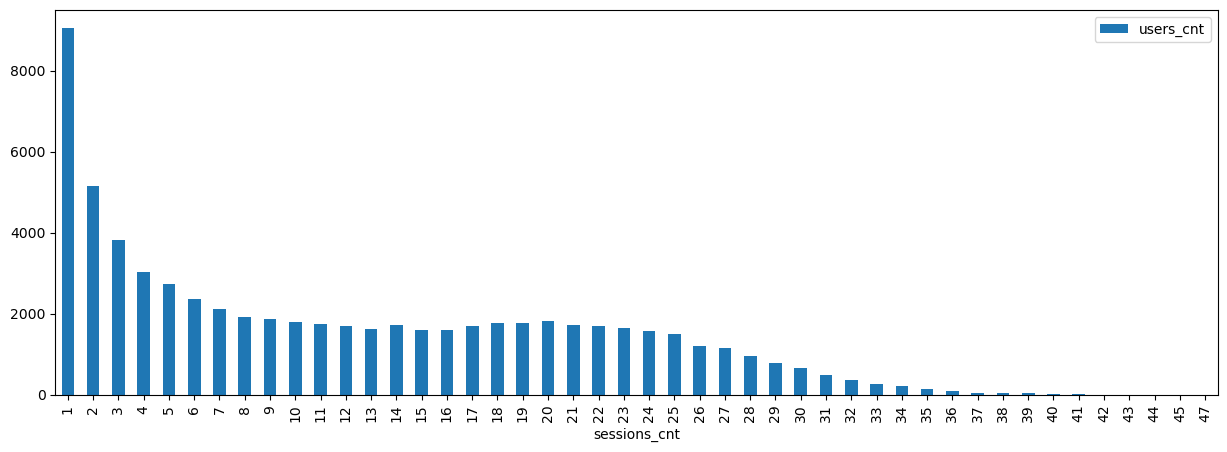

In [8]:
users_count.plot.bar(x='sessions_cnt', y='users_cnt', figsize=(15, 5))

In [9]:
len(data) / len(data['user_id'].unique())

11.86530244765916

In [10]:
import matplotlib.pyplot as plt

(array([7.54129e+05, 9.69100e+03, 6.84000e+03, 3.91200e+03, 1.89500e+03,
        7.89000e+02, 2.22000e+02, 6.60000e+01, 1.20000e+01, 1.00000e+00]),
 array([     0. ,  22093.7,  44187.4,  66281.1,  88374.8, 110468.5,
        132562.2, 154655.9, 176749.6, 198843.3, 220937. ]),
 <BarContainer object of 10 artists>)

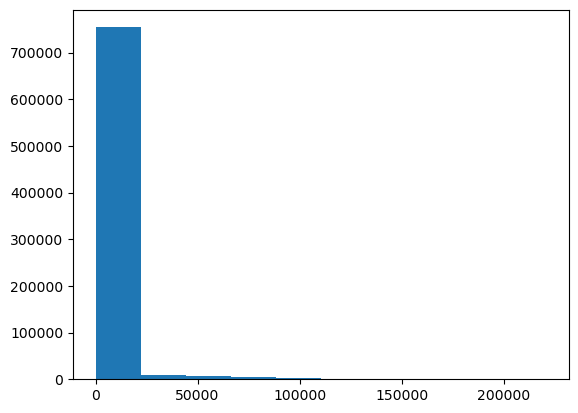

In [11]:
# Задача - построить визуально наглядную гистограмму распределения ценностей сессий
plt.hist(data['value'])

(array([7.42969e+05, 5.19000e+02, 5.53000e+02, 5.48000e+02, 5.22000e+02,
        5.42000e+02, 5.81000e+02, 5.40000e+02, 5.32000e+02, 5.53000e+02]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <BarContainer object of 10 artists>)

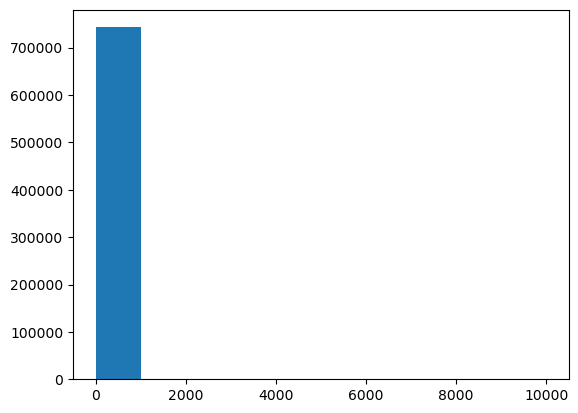

In [12]:
plt.hist(data.loc[data['value'] <= 10000]['value'])

(array([5.48041e+05, 1.47064e+05, 3.68100e+04, 8.55500e+03, 1.77300e+03,
        4.06000e+02, 1.28000e+02, 7.50000e+01, 6.40000e+01, 5.30000e+01]),
 array([  0. ,  99.8, 199.6, 299.4, 399.2, 499. , 598.8, 698.6, 798.4,
        898.2, 998. ]),
 <BarContainer object of 10 artists>)

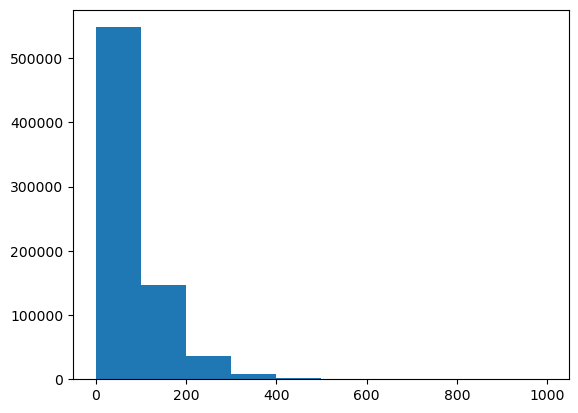

In [13]:
plt.hist(data.loc[data['value'] <= 1000]['value'])

(array([367676., 180365.,  96749.,  50315.,  24846.,  11964.,   5843.,
          2712.,   1254.,    535.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

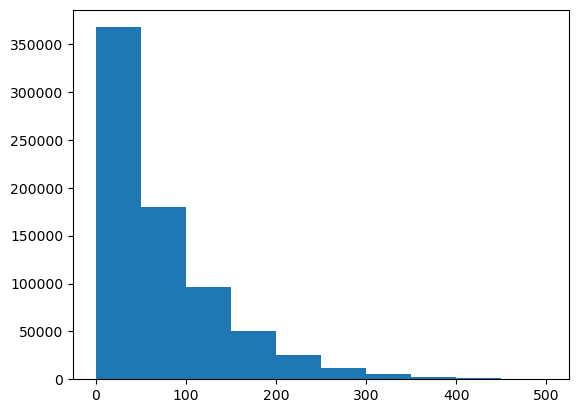

In [14]:
plt.hist(data.loc[data['value'] <= 500]['value'])

In [15]:
value_bins = pd.cut(data['value'],
                    [0, 25, 50, 75, 100, 150, 200, 300, 400, 500, data['value'].max()], 
                    include_lowest=True)

In [16]:
value_bins

0         (100.0, 150.0]
1          (75.0, 100.0]
2          (75.0, 100.0]
3         (-0.001, 25.0]
4         (200.0, 300.0]
               ...      
777552    (100.0, 150.0]
777553    (100.0, 150.0]
777554    (100.0, 150.0]
777555    (150.0, 200.0]
777556    (-0.001, 25.0]
Name: value, Length: 777557, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 25.0] < (25.0, 50.0] < (50.0, 75.0] < (75.0, 100.0] ... (200.0, 300.0] < (300.0, 400.0] < (400.0, 500.0] < (500.0, 220937.0]]

In [17]:
data['value_bins'] = value_bins

In [18]:
value_bins = data.groupby('value_bins')['session_id'].count().reset_index()
value_bins

,value_bins,session_id
0,"(-0.001, 25.0]",233912
1,"(25.0, 50.0]",138483
2,"(50.0, 75.0]",102928
3,"(75.0, 100.0]",75298
4,"(100.0, 150.0]",95534
5,"(150.0, 200.0]",49630
6,"(200.0, 300.0]",36278
7,"(300.0, 400.0]",8435
8,"(400.0, 500.0]",1761
9,"(500.0, 220937.0]",35298


<Axes: xlabel='value_bins'>

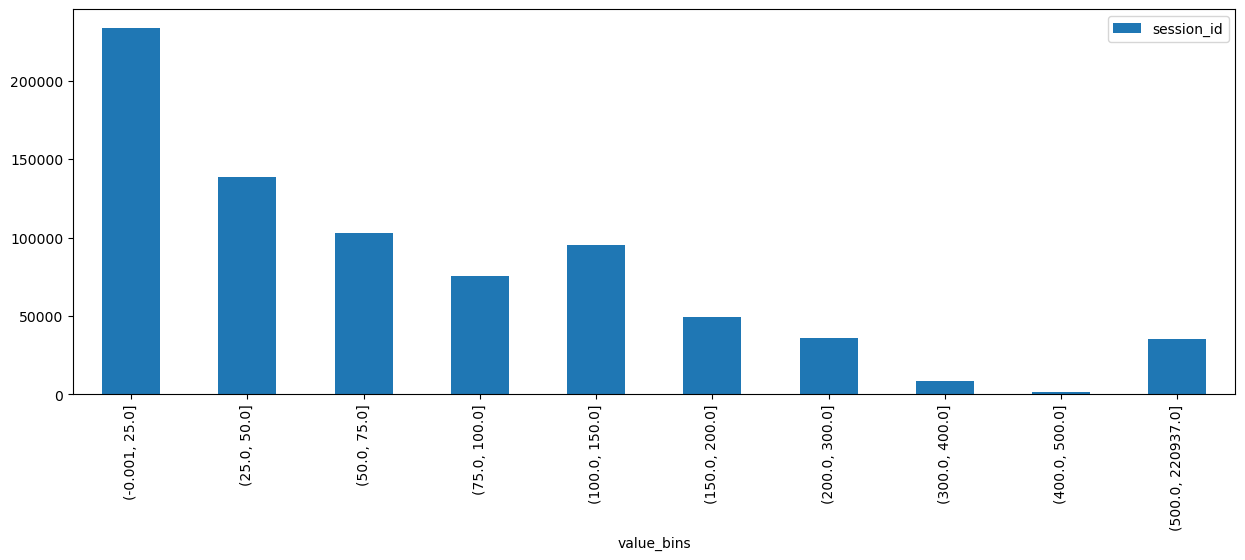

In [19]:
value_bins.plot.bar(x='value_bins', y='session_id', figsize=(15, 5))

In [20]:
values_and_purchases = data.groupby(['has_purchase', 'value_bins'])['session_id'].count().reset_index()
values_and_purchases

,has_purchase,value_bins,session_id
0,0,"(-0.001, 25.0]",233911
1,0,"(25.0, 50.0]",138481
2,0,"(50.0, 75.0]",102921
3,0,"(75.0, 100.0]",75288
4,0,"(100.0, 150.0]",95512
5,0,"(150.0, 200.0]",49606
6,0,"(200.0, 300.0]",36237
7,0,"(300.0, 400.0]",8380
8,0,"(400.0, 500.0]",1714
9,0,"(500.0, 220937.0]",435


<Axes: xlabel='value_bins'>

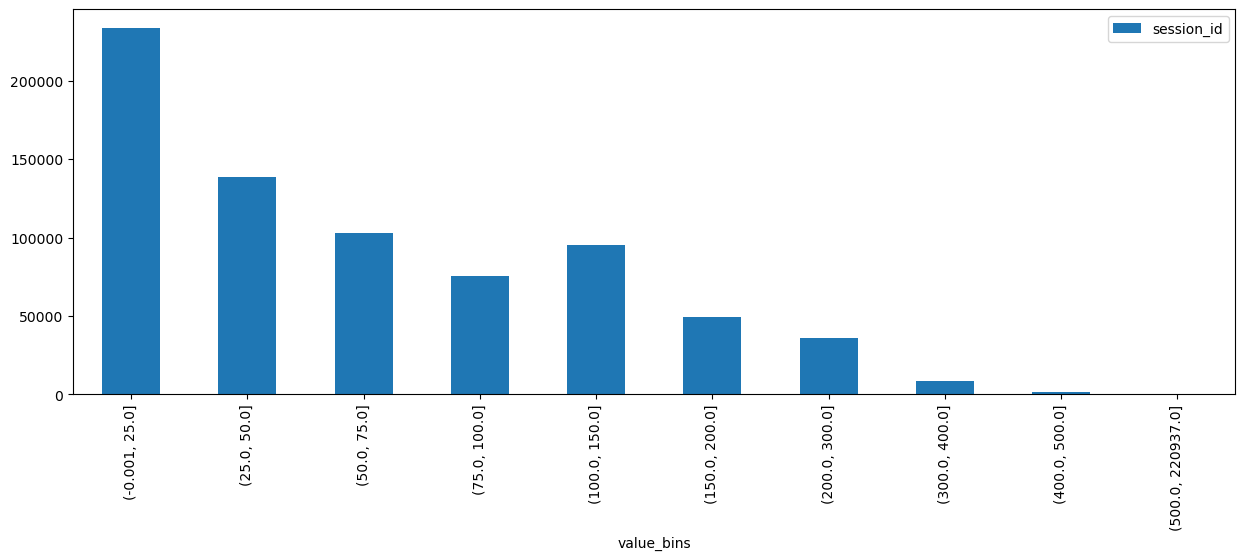

In [21]:
values_and_purchases.loc[values_and_purchases['has_purchase'] == 0].plot.bar(x='value_bins', 
                                                                             y='session_id', figsize=(15,5))

<Axes: xlabel='value_bins'>

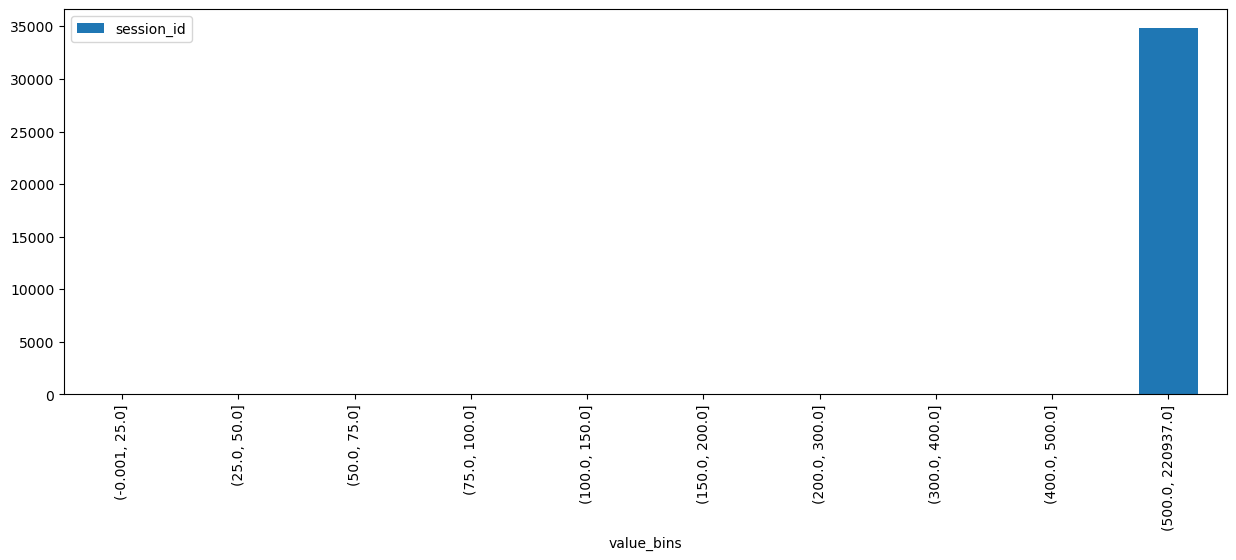

In [22]:
values_and_purchases.loc[values_and_purchases['has_purchase'] == 1].plot.bar(x='value_bins', 
                                                                             y='session_id', figsize=(15,5))

In [23]:
value_bins = pd.cut(data['value'], 
                    bins=[0, 25, 50, 75, 100, 150, 200, 300, 400, 500, data['value'].max()],
                    labels=[0, 25, 50, 75, 100, 150, 200, 300, 400, 500],
                    include_lowest=True)

In [24]:
value_bins

0         100
1          75
2          75
3           0
4         200
         ... 
777552    100
777553    100
777554    100
777555    150
777556      0
Name: value, Length: 777557, dtype: category
Categories (10, int64): [0 < 25 < 50 < 75 ... 200 < 300 < 400 < 500]

In [25]:
data['value_bins'] = value_bins

(array([3.0000e+00, 1.7000e+01, 2.2000e+01, 2.4000e+01, 4.1000e+01,
        0.0000e+00, 5.5000e+01, 0.0000e+00, 4.7000e+01, 3.4863e+04]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

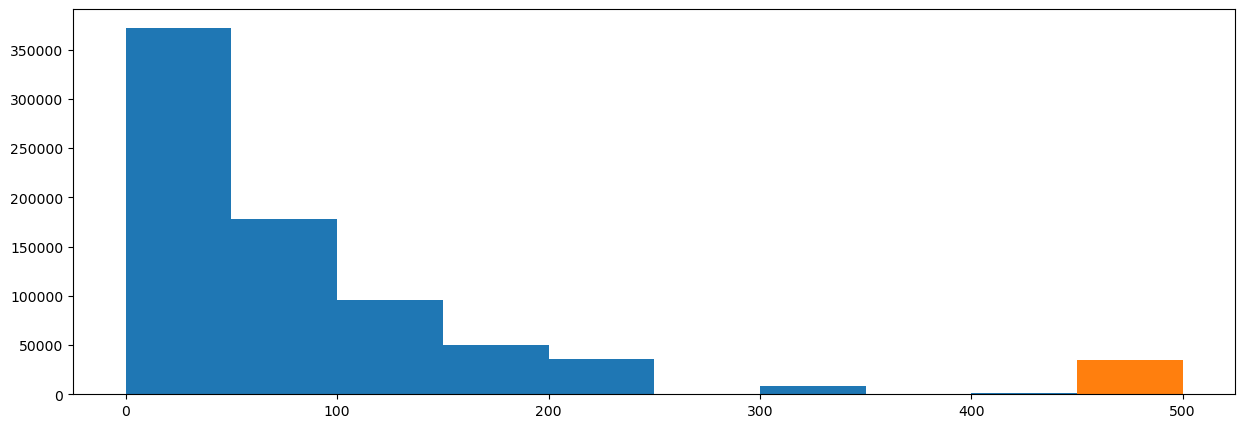

In [26]:
fig = plt.figure(figsize=(15,5))
plt.hist(data.loc[data['has_purchase'] == 0]['value_bins'])
plt.hist(data.loc[data['has_purchase'] == 1]['value_bins'])

In [27]:
# Задача - наглядно визуализировать нагрузку на сервера
servers = pd.read_csv('servers.csv')
servers.head()

,session_id,server_id
0,784863,2027429
1,784864,1522456
2,784865,1522456
3,784866,1522456
4,784867,646955


In [28]:
merged = pd.merge(data, servers, on='session_id', how='inner')
merged.head()

,date,session_id,user_id,duration,value,has_purchase,value_bins,server_id
0,2022-07-01,785266,109298,1680,137,0,100,1859749
1,2022-07-01,785333,119496,713,77,0,75,1522456
2,2022-07-01,785490,123265,1266,88,0,75,646955
3,2022-07-01,785585,132511,844,14,0,0,1859749
4,2022-07-01,785635,132728,1534,231,0,200,646955


In [29]:
servers = merged.groupby('server_id')[['session_id', 'duration']].agg({'session_id': 'count', 'duration': 'sum'})
servers.head()

,session_id,duration
server_id,,
646955,129638,100022330
1522456,258778,200264171
1859749,259396,200964157
2027429,129745,100700687


array([<Axes: ylabel='session_id'>, <Axes: ylabel='duration'>],
      dtype=object)

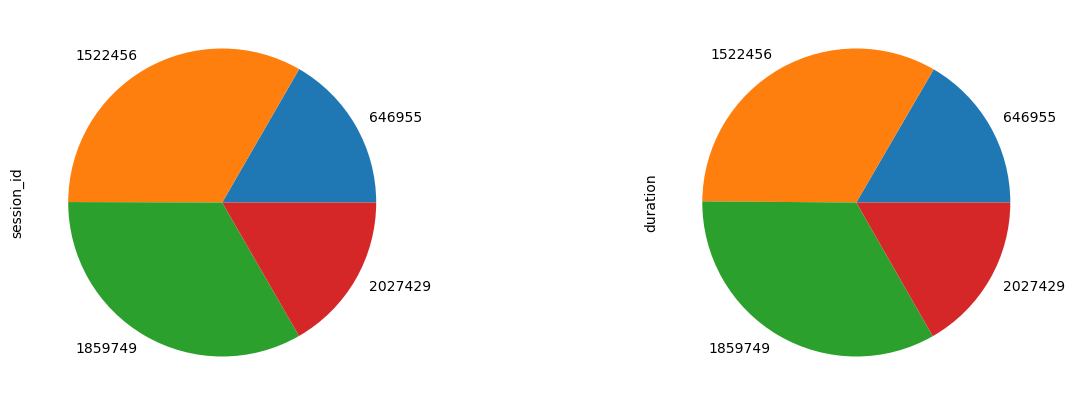

In [30]:
servers.plot.pie(subplots=True, figsize=(15, 5), legend=False)

<Axes: xlabel='duration', ylabel='value'>

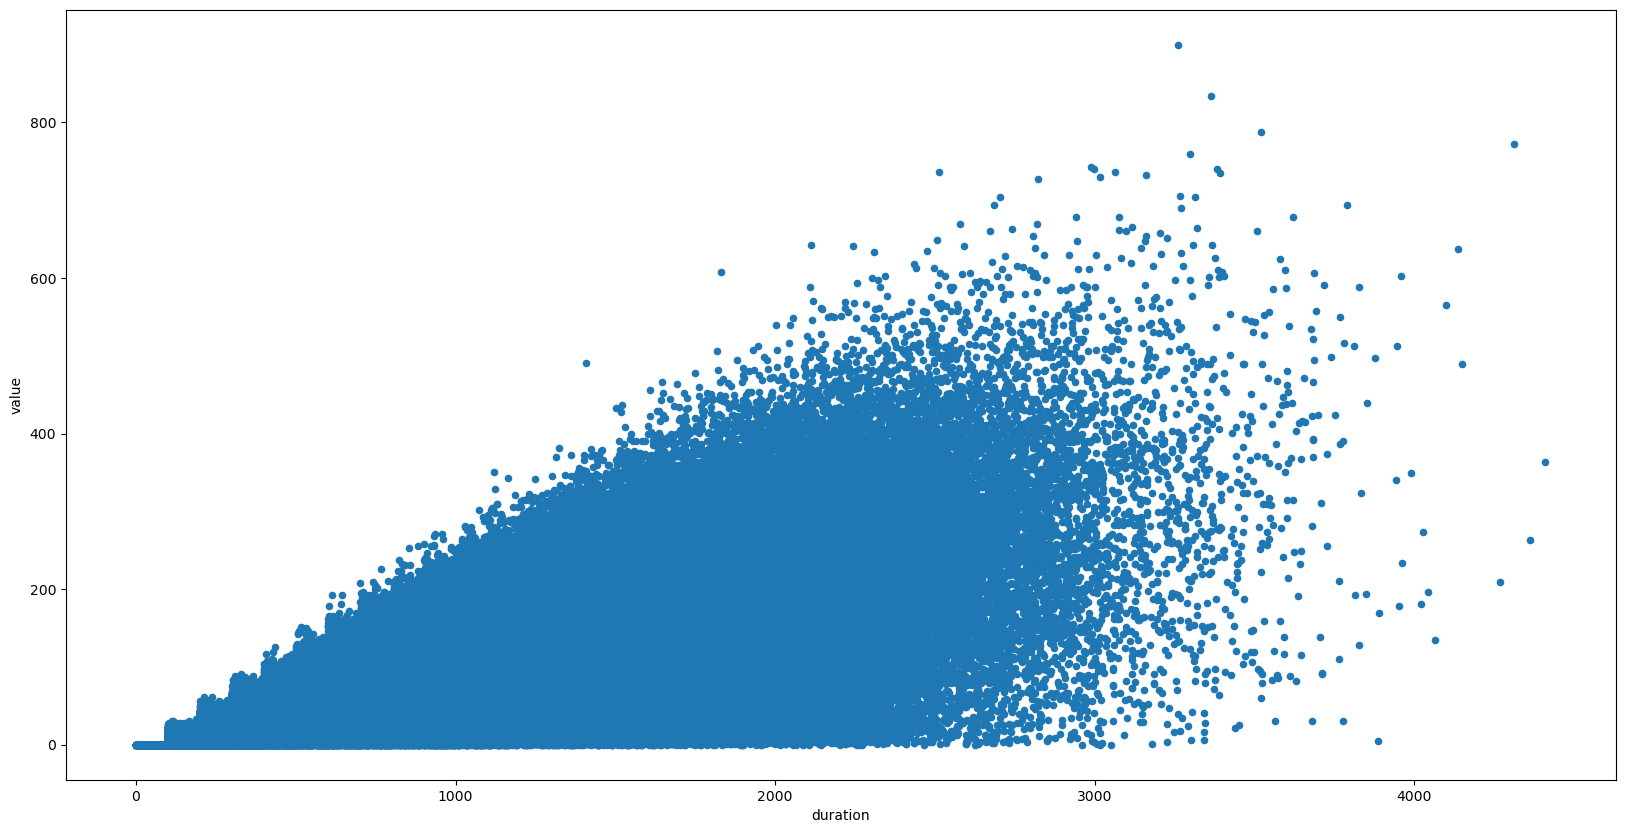

In [31]:
# Задача - с помощью визуализации построить гипотезу о зависимости ценности сессии от ее длительности
# Для упрощения сессии с покупкой исключить
data.loc[data['has_purchase'] == 0].plot.scatter(x='duration', y='value', figsize=(20, 10))

In [32]:
data['duration'].describe()

count    777557.000000
mean        774.157194
std         573.773848
min           1.000000
25%         320.000000
50%         659.000000
75%        1113.000000
max        4527.000000
Name: duration, dtype: float64

In [33]:
duration_bins = pd.cut(data['duration'], 
                       bins=[0, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, data['duration'].max()],
                       labels=[0, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000],
                       include_lowest=True)
duration_bins

0         1500
1          500
2         1000
3          500
4         1500
          ... 
777552    1000
777553     500
777554     500
777555    1000
777556       0
Name: duration, Length: 777557, dtype: category
Categories (10, int64): [0 < 250 < 500 < 1000 ... 2500 < 3000 < 3500 < 4000]

In [34]:
data['duration_bins'] = duration_bins

In [35]:
data.head()

,date,session_id,user_id,duration,value,has_purchase,value_bins,duration_bins
0,2022-07-01,785266,109298,1680,137,0,100,1500
1,2022-07-01,785333,119496,713,77,0,75,500
2,2022-07-01,785490,123265,1266,88,0,75,1000
3,2022-07-01,785585,132511,844,14,0,0,500
4,2022-07-01,785635,132728,1534,231,0,200,1500


In [36]:
pivot = data.loc[data['has_purchase'] == 0].pivot_table('session_id', 
                                                        index='value_bins', 
                                                        columns='duration_bins', 
                                                        aggfunc='count')

In [37]:
pivot

duration_bins,0,250,500,1000,1500,2000,2500,3000,3500,4000
value_bins,,,,,,,,,,
0,142956,56100,25061,7002,2141,534,100,16,1,0
25,9170,66141,49644,10227,2535,645,98,18,3,0
50,36,19841,63165,15437,3489,794,138,20,1,0
75,0,2191,46871,20371,4654,994,168,28,11,0
100,0,73,37174,42511,12568,2640,469,69,7,1
150,0,0,5344,26328,13749,3480,610,86,7,2
200,0,0,337,11234,16307,6664,1454,217,21,3
300,0,0,0,374,3173,3416,1172,217,27,1
400,0,0,0,1,247,794,520,125,26,1


In [38]:
import seaborn as sns

<Axes: xlabel='duration_bins', ylabel='value_bins'>

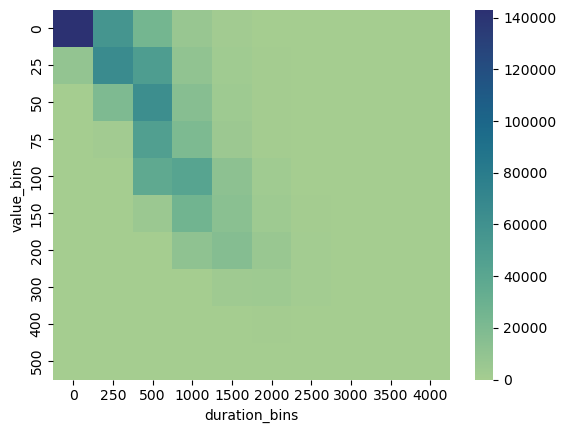

In [39]:
sns.heatmap(pivot, annot=False, cmap='crest')

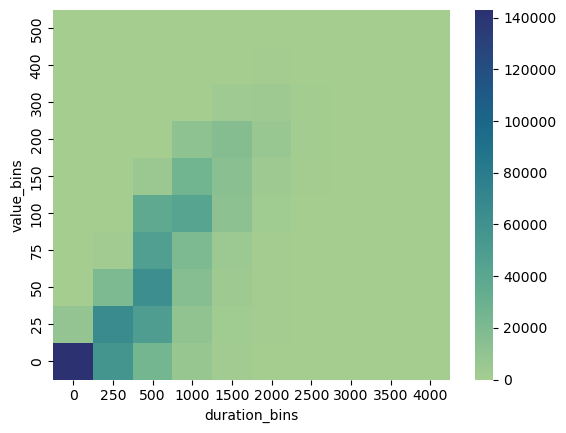

In [40]:
ax = sns.heatmap(pivot, annot=False, cmap='crest')
ax.invert_yaxis()